台泥
None
{"status":200,"message":"ok"}

 時間:10:47:16 
 台泥 [1101] 
 盤中最低價:32.50 
 盤中最高價:32.70  
 最新成交價: None 
 成交量: - 
 開盤價: 32.60
友達
None
{"status":200,"message":"ok"}

 時間:10:47:16 
 友達 [2409] 
 盤中最低價:18.80 
 盤中最高價:19.00  
 最新成交價: None 
 成交量: - 
 開盤價: 18.95
光寶科
110.50
{"status":200,"message":"ok"}

 時間:10:47:17 
 光寶科 [2301] 
 盤中最低價:110.00 
 盤中最高價:114.00  
 最新成交價: 110.50 
 成交量: 1 
 開盤價: 113.00
亞光
None
{"status":200,"message":"ok"}

 時間:10:47:17 
 亞光 [3019] 
 盤中最低價:67.60 
 盤中最高價:68.90  
 最新成交價: None 
 成交量: - 
 開盤價: 68.70
台泥
{"status":200,"message":"ok"}


c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.savefig(**save)
c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 27877 (\N{CJK UNIFIED IDEOGRAPH-6CE5}) missing from current font.
  fig.savefig(**save)


{"status":200,"message":"ok"}
success
友達
{"status":200,"message":"ok"}


c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 21451 (\N{CJK UNIFIED IDEOGRAPH-53CB}) missing from current font.
  fig.savefig(**save)
c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 36948 (\N{CJK UNIFIED IDEOGRAPH-9054}) missing from current font.
  fig.savefig(**save)


{"status":200,"message":"ok"}
success
光寶科
{"status":200,"message":"ok"}


c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from current font.
  fig.savefig(**save)
c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 23542 (\N{CJK UNIFIED IDEOGRAPH-5BF6}) missing from current font.
  fig.savefig(**save)
c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 31185 (\N{CJK UNIFIED IDEOGRAPH-79D1}) missing from current font.
  fig.savefig(**save)


{"status":200,"message":"ok"}
success
亞光
{"status":200,"message":"ok"}


c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 20126 (\N{CJK UNIFIED IDEOGRAPH-4E9E}) missing from current font.
  fig.savefig(**save)
c:\work\anaconda\envs\test\lib\site-packages\mplfinance\plotting.py:942: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from current font.
  fig.savefig(**save)


{"status":200,"message":"ok"}
success


c:\work\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20126 (\N{CJK UNIFIED IDEOGRAPH-4E9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\work\anaconda\envs\test\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


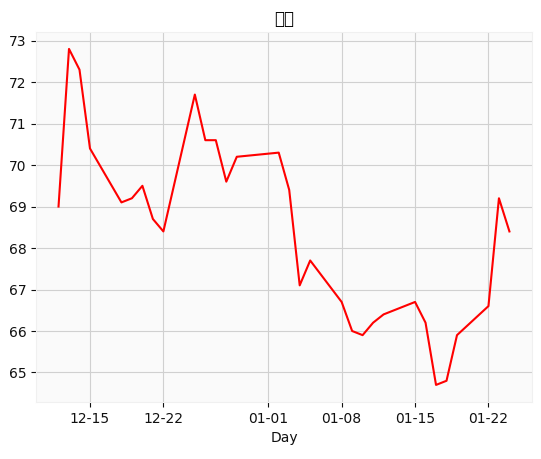

In [10]:
import urllib
import dateutil 
import matplotlib.pyplot as plt
import pandas
import datetime,time
import json
import twstock
import requests
import schedule
from pathlib import Path
import matplotlib.dates as mpl_dates
import time
import mplfinance as mpf

def getFormateFloat(NumberString):
    if NumberString != "-":
        NumberString = format(float(NumberString), '.2f')
        return NumberString

def SendLineNotify(msgString):
    #lineToken = 'HcmWNJxxh6s07aL65t05LCzNudclQasRz8VoacOBRuf'  ##個人測試用
    lineToken = 'H4lHQ7oA2PHhBQraqTxiVtT16FsmpsgvCs7varGlWz4'
    url = "https://notify-api.line.me/api/notify"
    payload={'message':{msgString}}
    headers = {'Authorization': 'Bearer ' + lineToken}
    response = requests.request("POST", url, headers=headers, data=payload)
    print(response.text)

def GetStockInfo():
    #匯入
    companyList = ['1101', '2409', '2301','3019']

    # 取得多檔即時資料
    stocks = twstock.realtime.get(companyList)
    df_realtime = pandas.DataFrame(stocks)

    for item in companyList:
        currentPrice = getFormateFloat(stocks[item]["realtime"]["latest_trade_price"])
        openPrice = getFormateFloat(stocks[item]["realtime"]["open"])
        lowPrice = getFormateFloat(stocks[item]["realtime"]["low"])
        highPrice = getFormateFloat(stocks[item]["realtime"]["high"])
        #estimatePrice = openPrice * 0.03
        tradeVolume = stocks[item]["realtime"]["trade_volume"]
        print(stocks[item]["info"]["name"])
        print(currentPrice)

        t = time.localtime()
        localtime = time.strftime("%H:%M:%S", t)
        
        msg=(f'\n 時間:{localtime} \n {stocks[item]["info"]["name"]} [{stocks[item]["info"]["code"]}] \n 盤中最低價:{lowPrice} \n 盤中最高價:{highPrice}  \n 最新成交價: {currentPrice} \n 成交量: {tradeVolume} \n 開盤價: {openPrice}')
        #當有最新成交價才寄出
        if (currentPrice != "None"):    
            SendLineNotify(msg) 
            print(msg)

        #當目前成交價大於開盤價3%則通知 
        # if currentPrice == "-":
        #     continue
        # if currentPrice >= estimatePrice:
        #     msg = (f' \n {stocks[item]["info"]["name"]} {stocks[item]["info"]["code"]} \n low:{lowPrice} ||high:{highPrice}  \n last_price {currentPrice}||成交量 {tradeVolume} \n 開盤價 {openPrice}||預估價格 {estimatePrice} \n 目前成交價高於開盤價格3%!')
        #     SendLineNotify(msg)

#每日股價查詢
def getStockInfo(stock_num):
    try:
        # 取得證交所股票data
        stock = twstock.Stock(stock_num)
        return stock
    except:
        print("Error")
    finally:
        time.sleep(15)

#每日股價查詢
def getStockInfoByK(stock):
    try:
        # 取得證交所股票data
        df = pandas.DataFrame({
            'date': stock.date,
            'open': stock.open,
            'high': stock.high,
            'low': stock.low,
            'close': stock.price,
            'volume': stock.capacity,  # 使用 twstock.Stock.capacity 來取得成交量
        }, index=pandas.to_datetime(stock.date, format='%Y%m%d'))
        return df
    except:
        print("Error")
    finally:
        time.sleep(15)

#產生每股一個月內股價資訊
def SetStockPhoto(stock_CN_Name,stock):
    print(stock_CN_Name)
    stock_price = stock.price
    stock_name = stock.sid
    date = stock.date # 時間
    open = stock.open # 開
    high = stock.high # 高
    ow = stock.low # 低
    close = stock.price # 收
    month = range(1,13)
    date_format= mpl_dates.DateFormatter("%M %d")
    imagePath = '../../../test.jpg'
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.clf()
    plt.plot(date,stock_price,'red')
    plt.xlabel('Day')
    plt.title (stock_CN_Name)
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%m-%d'))
    plt.savefig(imagePath)
    SendPhotoLineNotify(stock_name+'-'+ stock_CN_Name+' 一個月內股價資訊圖',imagePath)

#產生每股數天K線圖
def SetStockPhotoByK(stock_CN_Name,stock):
    df = getStockInfoByK(stock)
    mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
    s = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
    # 針對線圖的外觀微調，將上漲設定為紅色，下跌設定為綠色，符合台股表示習慣
    # 接著把自訂的marketcolors放到自訂的style中，而這個改動是基於預設的yahoo外觀
    image_path = '../../../testK.jpg'
    save_path = dict(fname=image_path)
    kwargs = dict(type='candle', mav=(5, 20, 60), volume=True,savefig= save_path,
              figratio=(10, 8), figscale=0.75, title=stock_CN_Name, style=s)
    # 設定可變參數kwargs，並在變數中填上繪圖時會用到的設定值
    mpf.plot(df, **kwargs)
    SendPhotoLineNotify(stock.sid+'-'+ stock_CN_Name+'股價K線圖',image_path)
  

#寄送每日股價圖
def SendPhotoLineNotify(msgString,imagePath):
    #lineToken = 'HcmWNJxxh6s07aL65t05LCzNudclQasRz8VoacOBRuf'  ##個人測試用
    lineToken = 'H4lHQ7oA2PHhBQraqTxiVtT16FsmpsgvCs7varGlWz4'
    url = "https://notify-api.line.me/api/notify"
    payload={'message':{msgString}}
    image = Path(imagePath).read_bytes()
    imageFile = {'imageFile' : image}
   
    headers = {'Authorization': 'Bearer ' + lineToken}
    response = requests.request("POST", url, headers=headers, data=payload, files=imageFile)
    print(response.text)
   

def SendStockPhoto():
    #匯入
    companyList = ['1101', '2409', '2301','3019']
    companyDict = {"1101":"台泥","2409":"友達","2301":"光寶科","3019":"亞光"}
    for item in companyList:
        companyString = companyDict[item]
        #取得股票資訊
        stock =getStockInfo(item)
        #產生每股一個月內股價資訊圖
        SetStockPhoto(companyString,stock)

        #產生每股數天K線圖
        SetStockPhotoByK(companyString,stock)

        # 刪除檔案路徑
        file = Path("../../../test.jpg")
        file.unlink()
        file = Path("../../../testK.jpg")
        file.unlink()
        print('success')

GetStockInfo()

SendStockPhoto()
# if __name__ == "__main__":
#     schedule.every().day.at("14:25").do(SendStockPhoto)     
#     schedule.every(10).minutes.until("14:30").do(GetStockInfo)
#     while True:
#         schedule.run_pending()
#         time.sleep(1)
